# Supervised Machine Learning: Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# reading
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/housing_prices.csv") 
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#data.columns
data['MSZoning'].apply(str)

0       RL
1       RL
2       RL
3       RL
4       RL
        ..
1455    RL
1456    RL
1457    RL
1458    RL
1459    RL
Name: MSZoning, Length: 1460, dtype: object

In [ ]:
data['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

###  Train-test split

Before performing a deeper exploration, we will split the dataset into 2 chunks: train and test. We will use the train set to find patterns in the data and create a model. The test set will remain untouched, unseen, unexplored. It will be the "reality check" for our model, it will let us know whether our model is able to generalize. 

Here, we're using the function `train_test_split` to shuffle the observations randomly and create the train and test sets for both the `X` and the `y` objects at the same time, ensuring that they are shuffled the same way:


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123000)
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
73,74,20,RL,85.0,10200,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdWo,NaN,0,5,2010,WD,Normal
460,461,60,FV,75.0,8004,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2009,New,Partial
482,483,70,RM,50.0,2500,Pave,Pave,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
113,114,20,RL,NaN,21000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,MnPrv,NaN,0,10,2007,COD,Abnorml
109,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal


#### Creating the "numeric pipe" and the "categoric pipe"

In [ ]:
# select categorical and numerical column names
X_cat_columns = X.select_dtypes(exclude="number").copy().columns
X_num_columns = X.select_dtypes(include="number").copy().columns

# create numerical pipeline, only with the SimpleImputer(strategy="median") and data scaling
scaler = StandardScaler(with_mean=False)
numeric_pipe = make_pipeline(scaler,
                             SimpleImputer(strategy="median"))
                             
 
 # create categorical pipeline, with the SimpleImputer(fill_value="N_A") and the OneHotEncoder
categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"), #   "most_frequent"
    OneHotEncoder(handle_unknown = 'ignore')
)

#### Using `ColumnTransformer` a pipeline with 2 branches (the `preprocessor`) 

We simply tell the pipeline the following:

- One branch, called `"num_pipe"`, will apply the steps in the `numeric_pipe` to the columns named in `X_num_columns`
- The second branch, called `"cat_pipe"`, will apply the steps in the `categoric_pipe` to the columns named in `X_cat_columns`

In [ ]:
# display pipeline
from sklearn import set_config
set_config(display = 'diagram')

In [ ]:
from sklearn.compose import ColumnTransformer  #make_column_Transformer then dont need to mention names

preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num_columns),
        ("cat_pipe", categoric_pipe, X_cat_columns)
      
    ]
)
preprocessor

ColumnTransformer(transformers=[('num_pipe',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler(with_mean=False)),
                                                 ('simpleimputer',
                                                  SimpleImputer(strategy='median'))]),
                                 Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFl...
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])

In [ ]:
X_num_columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [ ]:
X_cat_columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
#scaling and creating linerreg model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
full_pipeline = make_pipeline(preprocessor)
#full_pipeline.named_steps

In [ ]:
full_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler(with_mean=False)),
                                                                  ('simpleimputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtU...
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))]))])

In [ ]:
#full_pipeline.predict(X_train, y_train)

In [ ]:
X_train_cleaned = full_pipeline.transform(X_train)
X_train_cleaned

<1168x300 sparse matrix of type '<class 'numpy.float64'>'
	with 79572 stored elements in Compressed Sparse Row format>

In [ ]:
X_test_cleaned = full_pipeline.transform(X_test)
X_test_cleaned

<292x300 sparse matrix of type '<class 'numpy.float64'>'
	with 19851 stored elements in Compressed Sparse Row format>

### Liner Regression
####Creating our first Linear Model

In [ ]:
array = np.array(X_train_cleaned).reshape(-1)
#array = array.astype(np.int32)

In [ ]:
#plt.subplots(figsize=(10, 8))
#sns.scatterplot(x=X_train_cleaned, y=y_train) #full_pipeline.X_train
#plt.show()

In [ ]:
lm.fit(X_train_cleaned, y_train)

LinearRegression()

In [ ]:
print(
    lm.coef_, 
    lm.intercept_
    )


Formula of a regression model:

y = a + b * X

where y is the target , X is the feature, b is the slope of the line and a is the y-intercept.

### Results on test set

In [ ]:
lm.predict((X_train_cleaned))


array([131147.30094924, 263119.55441614, 163948.7466777 , ...,
       112479.90189252, 138055.9962825 , 139519.62312905])

In [ ]:
results = pd.DataFrame({
    'predictions':lm.predict(X_test_cleaned),
    'true_values':y_test
})
results.head()

,predictions,true_values
1398,121032.969266,138000
955,192045.135040,145000
480,337816.681530,326000
1088,134410.615021,137500
647,151024.086156,155000


* Mean Squared Error (MSE): is calculated as the mean or average of the squared differences between predicted and expected target values.
$$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_{i} - y_{e})^{2}$$

In [ ]:
mse_pre = (results
               .assign(diff = lambda x: (x.true_values - x.predictions)**2)
               .agg({'diff':{'sum','count'}}))
mse = mse_pre.loc['sum'] / mse_pre.loc['count']
mse

diff    1.139872e+09
dtype: float64

In [ ]:
# check our results with sklearn metrics
mod_res = {}
mod_res['1st_iter'] = {}
from sklearn.metrics import mean_squared_error
mod_res['1st_iter']['mse'] = mean_squared_error(results.true_values, results.predictions)
mod_res['1st_iter']['mse']

1139871592.016277

* Root Mean Squared Error (RMSE): 
$$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_{i} - y_{e})^{2}}$$

In [ ]:
rmse = (mse_pre.loc['sum'] / mse_pre.loc['count'])**0.5
rmse

diff    33761.984421
dtype: float64

* Mean Absolute Error (MAE)
$$MAE = \frac{1}{n}\sum_{i=1}^{n} |y_{i} - y_{e}|$$

In [ ]:
mae_pre = (results
               .assign(diff = lambda x: abs(x.true_values - x.predictions))
               .agg({'diff':{'sum','count'}}))
mod_res['1st_iter']['mae'] = mae_pre.loc['sum'] / mae_pre.loc['count']
mod_res['1st_iter']['mae']

diff    18333.235847
dtype: float64

In [ ]:
# check our results with sklearn metrics
from sklearn.metrics import mean_absolute_error
mod_res['1st_iter']['mae'] = mean_absolute_error(results.true_values, results.predictions)
mod_res['1st_iter']['mae']

18333.235846680553

* Mean Absolute Percentage Error (MAPE)

$$MAPE = \frac{1}{n}\sum_{i=1}^{n} |\frac{y_{i} - y_{e}}{y_{i}}|$$

In [ ]:
# Given that MAPE (mean absolute percentage error) doesn't exist in this version of sklearn, let's write a function:
def mean_abs_perc_error(y_true, y_pred):
    results = pd.DataFrame({
        'predictions':y_pred,
        'true_values':y_true
    })
    mape_pre = (results
               .assign(diff = lambda x: abs(x.true_values - x.predictions)/x.true_values)
               .agg({'diff':{'sum','count'}}))
    mape = mape_pre.loc['sum'] / mape_pre.loc['count']
    return mape.values[0]

# from sklearn.metrics import mean_absolute_percentage_error
mod_res['1st_iter']['mape'] = mean_abs_perc_error(results['true_values'], results['predictions'])
mod_res['1st_iter']['mape']
mod_res

{'1st_iter': {'mae': 18333.235846680553,
  'mape': 0.10433685224109003,
  'mse': 1139871592.016277}}


        MSE: 1139871592.016277
        RMSE: 33761.9844205917
        MAE: 18333.235846680553
        MAPE: 0.10433685224109003
        
466500 37900


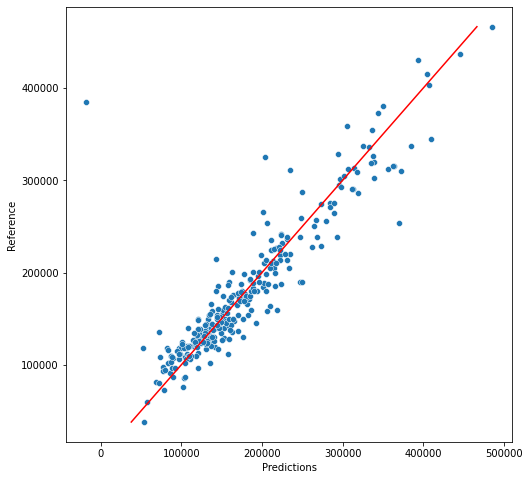

In [ ]:
def plot_predictions(y_true, y_pred): 
    print(
        f"""
        MSE: {mean_squared_error(y_true, y_pred)}
        RMSE: {mean_squared_error(y_true, y_pred)**0.5}
        MAE: {mean_absolute_error(y_true, y_pred)}
        MAPE: {mean_abs_perc_error(y_true, y_pred)}
        """
    )
    
    max_preds = min([max(y_pred.tolist()), max(y_true.tolist())])
    min_preds = max([min(y_pred.tolist()), min(y_true.tolist())])
    
    print(max_preds, min_preds)
    # plot
    plt.figure(figsize=(8,8))
    sns.scatterplot(x=y_pred, y=y_true)
    sns.lineplot(x=[min_preds,max_preds], y=[min_preds, max_preds], color='red')
    plt.ylabel('Reference')
    plt.xlabel('Predictions')
    plt.show()

    return {
        'mse': mean_squared_error(y_true, y_pred), 
        'rmse': mean_squared_error(y_true, y_pred)**0.5,
        'mae': mean_absolute_error(y_true, y_pred),
        'mape': mean_abs_perc_error(y_true, y_pred)
    }

mod_res['1st_iter'] = plot_predictions(y_test, results['predictions'])

In [ ]:
train_score = lm.score(X_train_cleaned,y_train)
test_score = lm.score(X_test_cleaned,y_test)

print(f'Train Accuracy : {train_score:.3f}')
print(f'Test Accuracy : {test_score:.3f}')

Train Accuracy : 0.944
Test Accuracy : 0.796


In [ ]:
## correlation matrix

## get correlations
data_corr = data.corr()

## irrelevant fields to be defined
fields = ['SalePrice']

## drop rows if needed
data_corr.drop(fields, inplace=True)

## drop cols if needed
data_corr.drop(fields, axis=1, inplace=True)

data_corr.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347


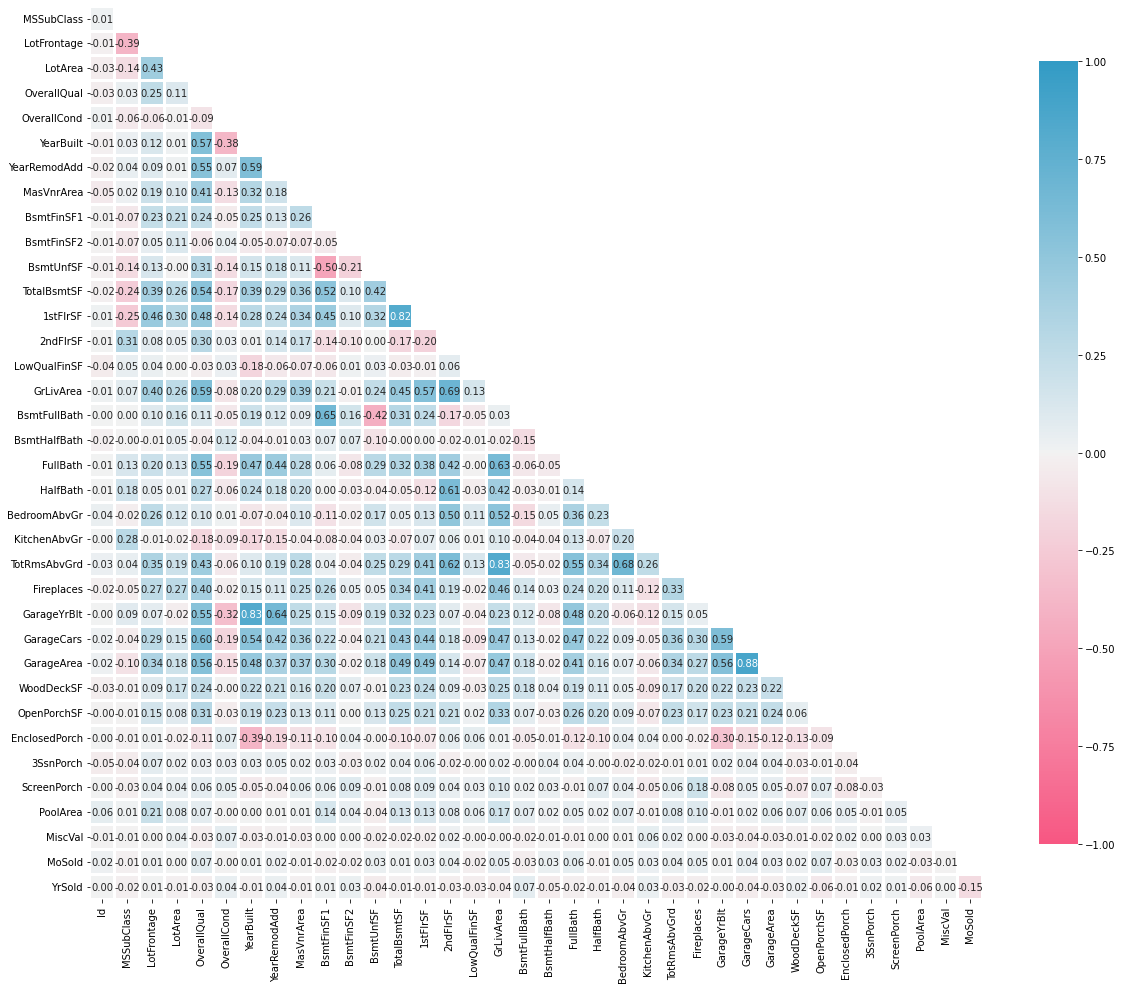

In [ ]:
## plotting the heatmap to identify highly correlated features 

fig, ax = plt.subplots(figsize=(20,18))
## mask
mask = np.triu(np.ones_like(data_corr, dtype=np.bool_))

## adjust mask and df
mask = mask[1:, :-1]
corr = data_corr.iloc[1:,:-1].copy()

## color map
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

## plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap=cmap,
           linewidths=2,
           vmin=-1, vmax=1, cbar_kws={"shrink": .8},square=True)

## yticks
plt.yticks(rotation=0)
plt.show()


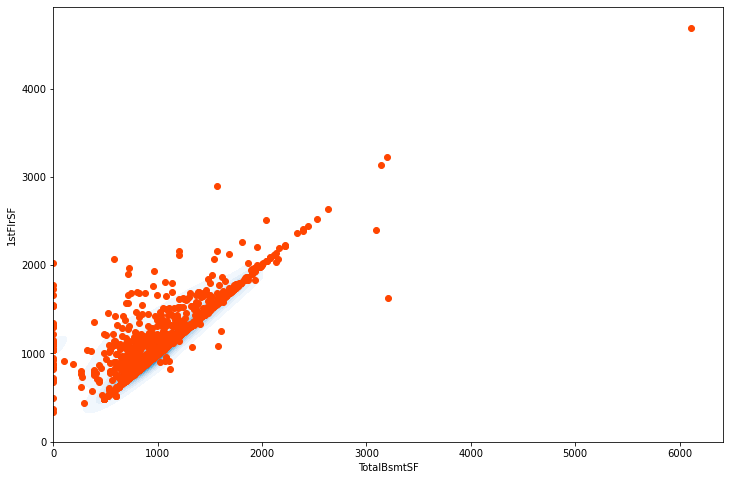

In [ ]:
## checking the correlationship between two variables

fig, ax = plt.subplots(1, figsize=(12,8))
sns.kdeplot(data = data, y='1stFlrSF', x='TotalBsmtSF', cmap='Blues',
           shade=True, thresh=0.05, clip=(-1,2000))
plt.scatter(y=data['1stFlrSF'], x=data['TotalBsmtSF'], color='orangered')

In [ ]:
sns.pairplot(data = X_train)

Output hidden; open in https://colab.research.google.com to view.